# 图像特效-直方图匹配

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src1 = cv2.imread('../datas/f2.jpg')
gray1 = cv2.imread('../datas/f2.jpg',0)
rgb1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
src2 = cv2.imread('../datas/f1.jpg')
gray2 = cv2.imread('../datas/f1.jpg',0)
rgb2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

In [3]:
def threshold(src,threshmax,newval):
    dst = np.zeros_like(src)
    idx = (src <= threshmax)
    dst[idx] = newval
    dst[~idx] = src[~idx]
    return dst

In [4]:
def histogram_matching(img, matching_img, number_of_bins = 255):
    img_res = img.copy()
    for d in range(img.shape[2]):
        img_hist, bins = np.histogram(img[:,:,d].flatten(), number_of_bins, normed=True)
        matching_img_hist, bins = np.histogram(matching_img[:,:,d].flatten(), number_of_bins, normed=True)
        #print bins[:-1]

        cdf_img = img_hist.cumsum()
        cdf_img = (255 * cdf_img / cdf_img[-1]).astype(np.uint8) #normalize

        cdf_match = matching_img_hist.cumsum()
        cdf_match = (255 * cdf_match / cdf_match[-1]).astype(np.uint8) #normalize

        im2 = np.interp(img[:,:,d].flatten(), bins[:-1], cdf_img)
        im3 = np.interp(im2, cdf_match, bins[:-1])

        img_res[:,:,d] = im3.reshape((img.shape[0]),img.shape[1])

    return img_res

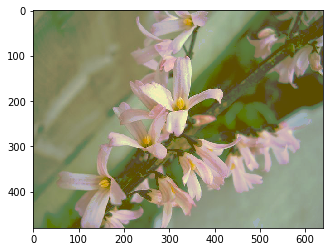

In [6]:
dst = histogram_matching(rgb1,rgb2)
plt.imshow(dst)